In [ ]:
#All the required libraries are imported here
from google.colab import drive
import os
import cv2
import torch
import matplotlib
import numpy as np
import torch.nn as nn
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage, Compose, ToTensor, Resize, Normalize
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset, Subset
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, KFold

In [ ]:
#Setting the path up for the dataset. Dataset is in Google Drive
drive.mount('/content/drive', force_remount=True)
images_location = "/content/drive/MyDrive/Dataset"
saved_location = "/content/drive/My Drive/loaded_images.npy"
model_location = "/content/drive/MyDrive/Colab Notebooks/Changed"

Mounted at /content/drive


In [ ]:
#Fetch the class
classList = os.listdir(images_location)

In [ ]:
#Setting labels 
label = [i for i in range(len(classesList))]
label_dict = dict(zip(classesList,label))
category_label = dict(zip(label, classesList))
print(category_label)

{0: 'cloth_mask', 1: 'ffp2_mask', 2: 'ffp2_with_valve', 3: 'no_mask', 4: 'surgical_mask'}


In [ ]:
data = []
for label in tqdm(classesList):
  data_path = os.path.join(images_location, label)
  print("Data Path", data_path)
  image_names = os.listdir(data_path)
  print("Image Name", image_names)
  for image in tqdm(image_names):
    image_path = os.path.join(data_path, image)
    images = cv2.imread(image_path) 
    try:
      imag = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
      img = cv2.resize(imag, (100,100))
        
      data.append((img, label_dict[label]))
      
    except Exception as e:
      print(e)

  0%|          | 0/5 [00:00<?, ?it/s]

Data Path /content/drive/MyDrive/Dataset/cloth_mask
Image Name ['1818.jpg', '2438.png', '0184.jpg', '3401.png', '2825.png', '3445.png', '2723.png', '0301.jpg', '3305.png', '2250.png', '2267.png', '0216.jpg', '0465.jpg', '1834.jpg', '0116.png', '0126.jpg', '0168.png', '2049.jpg', '2233.png', '2271.png', '0748.jpg', '2315.png', '2324.png', '2409.png', '2321.png', '2387.png', '2320.png', '2341.png', '2899.png', '2868.png', '2836.png', '2463.png', '2852.png', '2900.png', '2912.png', '2764.png', '2534.png', '2554.png', '2664.png', '2644.png', '2987.png', '2850.png', '2778.png', '2767.png', '2917.png', '2777.png', '2483.png', '2985.png', '3266.png', '3069.png', '3281.png', '3436.png', '3452.png', '3009.png', '3344.png', '3279.png', '3324.png', '3341.png', '3134.png', '3395.png', '3219.png', '3226.png', '3051.png', '3208.png', '3411 copy.png', '3121.png', '3227.png', '3311.png', '3400.png', '3390.png', '3384.png', '3419.png', '3370.png', '3392.png', '3389.png', '3411.png', '3396.png', '3442.p


 20%|██        | 1/5 [00:34<02:18, 34.57s/it]

Data Path /content/drive/MyDrive/Dataset/ffp2_mask
Image Name ['5218.jpg', 'saturated_180_5323.jpeg', 'saturated_60_188.jpeg', 'saturated_55_3869.jpeg', 'saturated_21_4192.jpeg', 'saturated_52_6686.jpeg', 'saturated_2_6587.jpeg', 'saturated_169_223.jpeg', 'saturated_178_7314.jpeg', 'saturated_42_6400.jpeg', 'saturated_5_4146.jpeg', 'saturated_173_9473.jpeg', 'saturated_191_8673.jpeg', 'saturated_4_1006.jpeg', 'saturated_28_7318.jpeg', 'saturated_22_6362.jpeg', 'saturated_27_4378.jpeg', 'saturated_41_3881.jpeg', 'saturated_13_1896.jpeg', 'saturated_45_9190.jpeg', 'saturated_176_4246.jpeg', 'saturated_18_3803.jpeg', 'saturated_175_6753.jpeg', 'saturated_39_2403.jpeg', 'saturated_16_3908.jpeg', 'saturated_3_6726.jpeg', 'saturated_59_7691.jpeg', 'saturated_170_706.jpeg', 'saturated_183_220.jpeg', 'saturated_30_5236.jpeg', 'saturated_32_5540.jpeg', 'saturated_47_427.jpeg', 'saturated_48_5391.jpeg', 'saturated_24_2526.jpeg', 'saturated_56_8489.jpeg', 'saturated_177_9552.jpeg', 'saturated_12_


 40%|████      | 2/5 [00:51<01:12, 24.30s/it]

Data Path /content/drive/MyDrive/Dataset/ffp2_with_valve
Image Name ['image_8172f439-6f2e-42a0-aa9a-33d090d14afc_470x.jpg', 'n95-dust-mask-with-valve19368136457.jpg', '61Y+KlSjUeL._SL1280_.jpg', 'Untitled8.jpg', 'file.jpg', '9227c0a2b88a5a726f8d3729310b904e04629aab.jpg', 'photo-1585221140117-5bc4baee9cd1.jpg', 'ANZ9D2007121Y3Q2.jpg', '61tPGMG9VYL._AC_SL1001_.jpg', 'photo-1616676499279-35a650c43298.jpg', 'HTB1ufbxfruWBuNjSszgq6z8jVXaw.jpg', 'Untitled9.jpg', 'Child-White-mask-with-valve-for-Covid-19-Coronavirus-front.jpg', '227955.jpg', 'Untitled11.jpg', 'Untitled6.jpg', 'main-qimg-285e06d1f9249337248b918a516350e4.jpg', 'Untitled12.jpg', 'HTB1pLM6r4SYBuNjSsphq6zGvVXaA.jpg', 'untitled13.jpg', 'Untitled10.jpg', '173958-full.jpg', 'photo-1584467735815-f778f274e296.jpg', '228432.jpg', 'untitled14.jpg', 'image_8172f439-6f2e-42a0-aa9a-33d090d14afc_470x (2).jpg', '1093-201911251728512748.jpg', '129.042_zoom.jpg', '144733-stsixxqxze-1595308612.jpg', 'n95-mask-price-where-Here-Quick-Way-to-it-1-7


 60%|██████    | 3/5 [01:06<00:40, 20.13s/it]

Data Path /content/drive/MyDrive/Dataset/no_mask
Image Name ['4796_r_c.jpg', '2787_r_c.jpg', '4668_r_c.jpg', '4967_r_c.jpg', '4795_r_c.jpg', '4880_r_c.jpg', '5176_r_c.jpg', '4928_r_c.jpg', '5000_r_c.jpg', '4783_r_c.jpg', '5122_r_c.jpg', '4968_r_c.jpg', '4956_r_c.jpg', '5073_r_c.jpg', '4990_r_c.jpg', '4782_r_c.jpg', '4973_r_c.jpg', '4974_r_c.jpg', '3330_r_c.jpg', '4670_r_c.jpg', '5035_r_c.jpg', '4680_r_c.jpg', '4793_r_c.jpg', '0135_r_c.jpg', '5203_r_c.jpg', '5295_r_c.jpg', '2443_r_c.jpg', '4753_r_c.jpg', '5021_r_c.jpg', '4992_r_c.jpg', '5161_r_c.jpg', '5047_r_c.jpg', '5115_r_c.jpg', '4989_r_c.jpg', '4874_r_c.jpg', '4869_r_c.jpg', '4679_r_c.jpg', '4784_r_c.jpg', '4993_r_c.jpg', '5059_r_c.jpg', '1807_r_c.jpg', '4643_r_c.jpg', '5063_r_c.jpg', '4955_r_c.jpg', '4882_r_c.jpg', '5039_r_c.jpg', '5214_r_c.jpg', '5302_r_c.jpg', '5849_r_c.jpg', '6017_r_c.jpg', '5990_r_c.jpg', '6026_r_c.jpg', '5955_r_c.jpg', '6019_r_c.jpg', '5961_r_c.jpg', '5599_r_c.jpg', '5602_r_c.jpg', '5922_r_c.jpg', '5977_r_c.j


 80%|████████  | 4/5 [01:15<00:15, 15.44s/it]

Data Path /content/drive/MyDrive/Dataset/surgical_mask
Image Name ['0032_r_c.jpg', '1899_r_c.jpg', '1873_r_c.jpg', '1987_r_c.jpg', '1848_r_c.jpg', '0006_r_c.jpg', '1996_r_c.jpg', '0254_r_c.jpg', '0170_r_c.jpg', '1913_r_c.jpg', '1280_r_c.jpg', '0153_r_c.jpg', '2121_r_c.jpg', '0109_r_c.jpg', '1872_r_c.jpg', '0246_r_c.jpg', '1963_r_c.jpg', '0243_r_c.jpg', '2106_r_c.jpg', '0164_r_c.jpg', '0131_r_c.jpg', '0004_r_c.jpg', '1822_r_c.jpg', '1849_r_c.jpg', '2110_r_c.jpg', '0099_r_c.jpg', '0017_r_c.jpg', '1973_r_c.jpg', '2013_r_c.jpg', '1836_r_c.jpg', '1843_r_c.jpg', '0158_r_c.jpg', '2059_r_c.jpg', '1889_r_c.jpg', '1881_r_c.jpg', '0286_r_c.jpg', '2184_r_c.jpg', '0183_r_c.jpg', '1954_r_c.jpg', '2174_r_c.jpg', '1904_r_c.jpg', '0161_r_c.jpg', '1961_r_c.jpg', '0257_r_c.jpg', '1925_r_c.jpg', '2063_r_c.jpg', '1920_r_c.jpg', '0027_r_c.jpg', '0015_r_c.jpg', '0127_r_c.jpg', '0160_r_c.jpg', '0048_r_c.jpg', '0241_r_c.jpg', '0248_r_c.jpg', '0133_r_c.jpg', '0211_r_c.jpg', '0213_r_c.jpg', '1894_r_c.jpg', '0067


100%|██████████| 5/5 [01:23<00:00, 16.64s/it]


In [ ]:
np.random.shuffle(data)  
np.save(saved_location, data)

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
#Customized Dataset class to set and get the data.
class DatasetGeneration(Dataset):
  #saving the data
  def __init__(self, data):
    self.data = data
    self.transformation = transforms.Compose([
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
                                   transforms.Resize((32,32))
                                   ])
  
  def __getitem__(self, id):
    return self.transformation(self.data[id][0]), torch.tensor(self.data[id][1])
  
  def __len__(self):
    return self.data.__len__()

In [ ]:
#Splitting of data into training and testing dataset
def data_loader(saved_location):
  data = np.load(saved_location, allow_pickle=True)

  training_data, testing_data = train_test_split(data, test_size = 0.3, random_state = 0)

  training_dataset = DatasetGeneration(training_data)
  testing_dataset = DatasetGeneration(testing_data)

  train_loader = DataLoader(training_dataset, batch_size=32)
  test_loader = DataLoader(testing_dataset, batch_size=32)

  return train_loader, test_loader
  

In [ ]:
def dataset_loader(saved_location):
  data = np.load(saved_location, allow_pickle=True)
  loaded_dataset = DatasetGeneration(data)
  return loaded_dataset

In [ ]:
#CNN Architecture to train the model.
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv_layer = nn.Sequential(
        #Layer 1
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        #Layer 2
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    
        #Layer 3
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

          #Layer 4
        nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(512),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )
    
    #Fully Connected Layer
    self.linear_layers = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(32 * 8 * 8, 128),
        nn.ReLU(inplace=True),
        nn.Linear(128, 64),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(64,5)
    )

  def forward(self, x):
    x = self.conv_layer(x)
    #print(x.shape)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x

In [ ]:
#This method will train the dataset according to the specified epoch number.
def model_trainer(train_loader, test_loader, epoch_number):
  model = CNN()

  loss_criteria = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  total_step = len(train_loader)
  training_accuracy_list = []
  training_loss_list = []

  for epoch in range(epoch_number):
    for i, (images, labels) in enumerate(train_loader):
      outputs = model(images)

      #Forward Pass
      training_loss = loss_criteria(outputs, labels)
      training_loss_list.append(training_loss.item())

      #Backpropogation and Optimization
      optimizer.zero_grad()
      training_loss.backward()
      optimizer.step()

      #Training Accuracy
      total = labels.size(0)
      _, predicted = torch.max(outputs.data, 1)
      correct = (predicted == labels).sum().item()
      training_accuracy_list.append(correct / total)

    print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
        .format(epoch + 1, epoch_number, training_loss.item(),
        (correct / total) * 100))

  return model

In [ ]:
#Confusion Matrix - Accuracy, f-measure, recall and precision and also plotting confusion Matrix
def testing_model(model, title, data_loader):
  model.eval()
  prediction_list = []
  accurate_list = []
  with torch.no_grad():
    for images, labels in data_loader:
      outputs = model(images)
      _, predicted = torch.max(model(images), 1)
      prediction_list.extend(predicted.detach().cpu().numpy())
      accurate_list.extend(labels.detach().cpu().numpy())
  print(prediction_list)
  print(accurate_list)
  print("{} Classification Report: ".format(title))
  print(classification_report(prediction_list, accurate_list))

In [ ]:
loaded_dataset = dataset_loader(saved_location)
print(len(loaded_dataset))
kfold = KFold(n_splits=10, shuffle=True, random_state=None)
fold_value = 1
for training_id, testing_id in kfold.split(loaded_dataset):
  print("Fold Number:", fold_value)

  training_dataset = Subset(loaded_dataset, training_id)
  testing_dataset = Subset(loaded_dataset, testing_id)
  train_loader = DataLoader(training_dataset, batch_size=64, num_workers=0, shuffle=True)
  test_loader = DataLoader(testing_dataset, batch_size=64, num_workers=0, shuffle=True)
  model = model_trainer(train_loader, test_loader, 10)
  model_name = "Model_Number_" + str(fold_value)
  testing_model(model, model_name, test_loader)
  fold_value+=1

2984
Fold Number: 1
Epoch [1/10], Loss: 1.3376, Accuracy: 42.62%
Epoch [2/10], Loss: 1.1227, Accuracy: 55.74%
Epoch [3/10], Loss: 1.1309, Accuracy: 49.18%
Epoch [4/10], Loss: 0.8108, Accuracy: 62.30%
Epoch [5/10], Loss: 0.6434, Accuracy: 81.97%
Epoch [6/10], Loss: 0.4731, Accuracy: 85.25%
Epoch [7/10], Loss: 0.3303, Accuracy: 91.80%
Epoch [8/10], Loss: 0.1791, Accuracy: 93.44%
Epoch [9/10], Loss: 0.0898, Accuracy: 96.72%
Epoch [10/10], Loss: 0.0434, Accuracy: 98.36%
[4, 1, 1, 2, 0, 2, 1, 1, 1, 4, 0, 1, 3, 0, 3, 1, 3, 3, 4, 0, 1, 4, 0, 1, 1, 1, 0, 2, 4, 4, 2, 3, 1, 1, 2, 3, 1, 2, 2, 2, 3, 2, 4, 0, 0, 1, 1, 1, 3, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 2, 4, 4, 3, 3, 2, 2, 4, 1, 3, 1, 2, 2, 4, 1, 1, 2, 1, 4, 1, 4, 0, 0, 0, 4, 3, 0, 3, 0, 0, 3, 0, 2, 1, 0, 4, 0, 3, 1, 1, 4, 1, 0, 0, 1, 0, 0, 3, 2, 3, 1, 3, 2, 1, 0, 1, 2, 1, 3, 1, 3, 1, 2, 0, 4, 1, 0, 2, 1, 1, 0, 3, 1, 1, 2, 0, 2, 3, 0, 3, 3, 0, 1, 2, 1, 2, 1, 4, 4, 2, 2, 2, 4, 2, 4, 3, 0, 1, 1, 2, 4, 3, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 

In [ ]:
model_location = "/content/drive/MyDrive/Colab Notebooks/Changed"

In [ ]:
model = model_trainer(train_loader, test_loader, epoch_number=10)

Epoch [1/10], Loss: 1.4161, Accuracy: 45.16%
Epoch [2/10], Loss: 1.2654, Accuracy: 43.55%
Epoch [3/10], Loss: 0.8964, Accuracy: 67.74%
Epoch [4/10], Loss: 0.8092, Accuracy: 77.42%
Epoch [5/10], Loss: 0.6356, Accuracy: 77.42%
Epoch [6/10], Loss: 0.3876, Accuracy: 91.94%
Epoch [7/10], Loss: 0.3274, Accuracy: 88.71%
Epoch [8/10], Loss: 0.1320, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0974, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0427, Accuracy: 100.00%


In [ ]:
#This method will save the model onto a pre-specified path.
def save_model(model, model_name, model_saved_location):
  torch.save(model.state_dict(), "{}/{}".format(model_saved_location, model_name))    

In [ ]:
model_name = "changed"
save_model(model, model_name, model_location)

In [ ]:
def load_data(data, path, label):
  
  #labels = []
  image_names = os.listdir(path)
  print("Image Name", image_names)
  print("Image Labels", label)
  for image in tqdm(image_names):
    image_path = os.path.join(path, image)
    images = cv2.imread(image_path) 
    try:
      imag = cv2.cvtColor(images, cv2.COLOR_BGR2RGB)
      img = cv2.resize(imag, (100,100))
          
      data.append((img, label))
        
    except Exception as e:
      print(e)
  return data

In [ ]:
#Entering some drive location of testing dataset
cloth_mask_male_dir = "/content/drive/MyDrive/Bias/gender/cloth_mask_male"
cloth_mask_female_dir = "/content/drive/MyDrive/Bias/gender/cloth_mask_female"
cloth_mask_child_dir = "/content/drive/MyDrive/Bias/age/cloth_mask_child"
cloth_mask_young_dir = "/content/drive/MyDrive/Bias/age/cloth_mask_young"
cloth_mask_old_dir = "/content/drive/MyDrive/Bias/age/cloth_mask_old"

#Getting surgical mask data
surgical_mask_male_dir = "/content/drive/MyDrive/Bias/gender/surgical_mask_male"
surgical_mask_female_dir = "/content/drive/MyDrive/Bias/gender/surgical_mask_female"
surgical_mask_child_dir = "/content/drive/MyDrive/Bias/age/surgical_mask_child"
surgical_mask_young_dir = "/content/drive/MyDrive/Bias/age/surgical_mask_young"
surgical_mask_old_dir = "/content/drive/MyDrive/Bias/age/surgical_mask_old"

#Getting Without mask data
without_mask_male_dir = "/content/drive/MyDrive/Bias/gender/no_mask_male"
without_mask_female_dir = "/content/drive/MyDrive/Bias/gender/no_mask_female"
without_mask_child_dir = "/content/drive/MyDrive/Bias/age/no_mask_child"
without_mask_young_dir = "/content/drive/MyDrive/Bias/age/no_mask_young"
without_mask_old_dir = "/content/drive/MyDrive/Bias/age/no_mask_old"

#Getting ffp2 mask data
ffp2_mask_male_dir = "/content/drive/MyDrive/Bias/gender/ffp2_mask_male"
ffp2_mask_female_dir = "/content/drive/MyDrive/Bias/gender/ffp2_mask_female"
ffp2_mask_child_dir = "/content/drive/MyDrive/Bias/age/ffp2_mask_child"
ffp2_mask_young_dir = "/content/drive/MyDrive/Bias/age/ffp2_mask_young"
ffp2_mask_old_dir = "/content/drive/MyDrive/Bias/age/ffp2_mask_old"

#Getting ffp2 mask with valve data
ffp2_valve_mask_male_dir = "/content/drive/MyDrive/Bias/gender/ffp2_mask_valve_male"
ffp2_valve_mask_female_dir = "/content/drive/MyDrive/Bias/gender/ffp2_mask_valve_female"
ffp2_valve_mask_child_dir = "/content/drive/MyDrive/Bias/age/ffp2_mask_valve_child"
ffp2_valve_mask_young_dir = "/content/drive/MyDrive/Bias/age/ffp2_mask_valve_young"
ffp2_valve_mask_old_dir = "/content/drive/MyDrive/Bias/age/ffp2_mask_valve_old"

#Getting testing dataset
cloth_testing_dataset = "/content/drive/MyDrive/Classification/cloth_mask"
ffp2_testing_dataset = "/content/drive/MyDrive/Classification/ffp2_mask"
surgical_testing_dataset = "/content/drive/MyDrive/Classification/surgical_mask"
without_mask_testing_dataset = "/content/drive/MyDrive/Classification/no_mask"
ffp2_valve_testing_dataset = "/content/drive/MyDrive/Classification/ffp2_mask_valve"

In [ ]:
print("_____Masks worn by Children______")
mask_child_data = []
mask_child_data = load_data(mask_child_data, without_mask_child_dir, 0)
mask_child_data = load_data(mask_child_data, surgical_mask_child_dir, 1)
mask_child_data = load_data(mask_child_data, ffp2_valve_mask_child_dir, 2)
mask_child_data = load_data(mask_child_data, ffp2_mask_child_dir, 3)
mask_child_data = load_data(mask_child_data, cloth_mask_child_dir, 4)

print("_____Masks worn by Young______")
mask_young_data = []
mask_young_data = load_data(mask_young_data, without_mask_young_dir, 0)
mask_young_data = load_data(mask_young_data, surgical_mask_young_dir, 1)
mask_young_data = load_data(mask_young_data, ffp2_valve_mask_young_dir, 2)
mask_young_data = load_data(mask_young_data, ffp2_mask_young_dir, 3)
mask_young_data = load_data(mask_young_data, cloth_mask_young_dir, 4)

print("_____Masks worn by Old______")
mask_old_data = []
mask_old_data = load_data(mask_old_data, without_mask_old_dir, 0)
mask_old_data = load_data(mask_old_data, surgical_mask_old_dir, 1)
mask_old_data = load_data(mask_old_data, ffp2_valve_mask_old_dir, 2)
mask_old_data = load_data(mask_old_data, ffp2_mask_old_dir, 3)
mask_old_data = load_data(mask_old_data, cloth_mask_old_dir, 4)
print("_____Masks worn by Males______")
mask_male_data = []
mask_male_data = load_data(mask_male_data, without_mask_male_dir, 0)
mask_male_data = load_data(mask_male_data, surgical_mask_male_dir, 1)
mask_male_data = load_data(mask_male_data, ffp2_valve_mask_male_dir, 2)
mask_male_data = load_data(mask_male_data, ffp2_mask_male_dir, 3)
mask_male_data = load_data(mask_male_data, cloth_mask_male_dir, 4)

print("_____Masks worn by Females______")
mask_female_data = []
mask_female_data = load_data(mask_female_data, without_mask_female_dir, 0)
mask_female_data = load_data(mask_female_data, surgical_mask_female_dir, 1)
mask_female_data = load_data(mask_female_data,  ffp2_valve_mask_female_dir, 2)
mask_female_data = load_data(mask_female_data, ffp2_mask_female_dir, 3)
mask_female_data = load_data(mask_female_data, cloth_mask_female_dir, 4)


_____Masks worn by Children______
Image Name ['58cf0c9b0dd2eaf118ce623c8907e619.jpg', 'images (12).jpg', 'images (9).jpg', 'images (18).jpg', 'images (3).jpg', 'download (2).jpg', 'images (6).jpg', 'images (5).jpg', 'download.jpg', 'images (8).jpg', 'download (3).jpg', 'images (4).jpg', 'images (7).jpg', 'images (1).jpg', 'images (15).jpg', '625d6aec4fbeb53864cacda4387469c278-13-lying-kids.rsquare.w330.jpg', 'images (10).jpg', 'download (1).jpg', 'images (19).jpg', 'images.jpg', 'images (13).jpg', 'images (11).jpg', 'images (16).jpg', 'images (14).jpg', 'images (17).jpg', 'images (2).jpg']
Image Labels 0


100%|██████████| 26/26 [00:00<00:00, 193.54it/s]


Image Name ['images (10).jpg', 'asian-little-cute-girl-4-260nw-1663247893.jpg', 'images (1).jpg', 'images (11).jpg', 'images (15).jpg', '360_F_331009489_JFKp4MRqYZlTsO8QRWLnFFSgkpWZNqJX.jpg', 'images (9).jpg', 'images (13).jpg', 'download (3).jpg', 'images (4).jpg', 'images (14).jpg', 'images (7).jpg', 'images (5).jpg', 'images (6).jpg', 'images (12).jpg', 'download (1).jpg', 'mask-girl.jpg', 'images (8).jpg', 'images.jpg', 'images (3).jpg', 'images (2).jpg', 'WesCare-3-Ply-GenericKidsWindow-Thumbnail-Lazada-1600x1600px_v1-10Resized_195x195@2x.jpg', 'download.jpg', 'images (17).jpg', 'download (2).jpg', 'images (16).jpg']
Image Labels 1


100%|██████████| 26/26 [00:00<00:00, 169.55it/s]


Image Name ['avoid-masks-with-valves-1280x720.jpg', 'Vritraz-Masks-for-kids-293x300.jpg', 'azx.jpg', 'product-jpeg-500x500.jpg', '81YfdLpu3UL._UX569_.jpg', 'avoid-masks-with-valves-1280x720-766x431.jpg', 'images.jpg', 'img1.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg', 'img6.jpg', 'img7.jpg', '1bd686f8a306e14f609691386920041b.jpg_360x360q75.jpg_.png', 'img8.jpg', '5e843925d4bc653ddaae8a73-large.jpg', 'Breath-Valve-Design-Replaceable-Filter-Anti-Dust-Mouth-Mask-Pm2-5-Filter-Respirator-Cartoon-Printing-Children-Kids-Reusable-Washable-Child-Facemask.jpg', 'kn95-kids-With-Valve.jpg', 'mp00095346-lifaair-lm95-children-kn95-respirator-mask-with-valve---5pc-descriptionImage - Copy.png', 'Child.png', 'Screenshot-2020-06-23-at-09.18.18.png', 'KidsMaskMain_400x.png', 'The_Peoples_Mask_Orange_Kids_Reusable_Mask_Edmonton_Reusable_kids_face_Masks_300x.png']
Image Labels 2


100%|██████████| 24/24 [00:00<00:00, 100.21it/s]


Image Name ['images (1).jpg', '1200x0.jpg', 'images (11).jpg', 'images (14).jpg', 'download (1).jpg', 'images (5).jpg', '2.1_800x (1).jpg', 'download (3).jpg', 'download.jpg', 'images (9).jpg', 'images (8).jpg', 'images.jpg', 'Image001_47f5f5a7-3a3c-42ec-b85c-ea85d17f7c89_300x300.jpg', '0_Mother-and-child-with-face-mask-and-hand-sanitizer.jpg', 'images (7).jpg', 'images (13).jpg', 'images (10).jpg', 'download (2).jpg', 'face-mask-kids-FFP2.jpg', 'images (4).jpg', 'download (11).jpg', 'kidmask.png', 'images (3).jpg', 'images (2).jpg', 'images (6).jpg', 'images (12).jpg']
Image Labels 3


100%|██████████| 26/26 [00:00<00:00, 154.01it/s]


Image Name ['images (11).jpg', 'images (1).jpg', 'images (25).jpg', 'images (2).jpg', 'images (4).jpg', 'images (37).jpg', 'images (5).jpg', 'images (8).jpg', 'images (32).jpg', 'images (34).jpg', 'images (27).jpg', 'images (18).jpg', 'images (3).jpg', 'images (33).jpg', 'images (29).jpg', 'images (9).jpg', 'images (35).jpg', 'images (7).jpg', 'images (26).jpg', 'images (28).jpg', 'images (17).jpg', 'images (30).jpg', 'images (6).jpg', 'images (36).jpg', 'images (31).jpg']
Image Labels 4


100%|██████████| 25/25 [00:00<00:00, 228.44it/s]


_____Masks worn by Young______
Image Name ['images (3).jpg', 'download (5).jpg', 'download (1).jpg', 'images (1).jpg', 'figure-out-face-shape-slide4.jpg', 'images (2).jpg', 'images (7).jpg', 'images.jpg', 'images (10).jpg', 'images (5).jpg', 'images (15).jpg', 'images (13).jpg', 'images (16).jpg', 'olivia and anne.jpg', 'images (6).jpg', 'view-girl-face-women-wallpaper.jpg', 'images (4).jpg', 'images (18).jpg', 'images (9).jpg', 'download.jpg', 'images (8).jpg', 'images (12).jpg', 'images (14).jpg', 'images (21).jpg', 'download (4).jpg', 'images (11).jpg']
Image Labels 0


100%|██████████| 26/26 [00:00<00:00, 124.47it/s]


Image Name ['images (5).jpg', 'images (15).jpg', 'images (16).jpg', 'images (8).jpg', 'images (3).jpg', 'images (17).jpg', 'images (9).jpg', 'images (13).jpg', 'images (1).jpg', 'images (7).jpg', 'images (12).jpg', 'images (20).jpg', 'images (19).jpg', 'images (6).jpg', 'images.jpg', 'images (14).jpg', 'download (2).jpg', 'images (4).jpg', 'download.jpg', 'images (10).jpg', 'images (2).jpg', 'images (11).jpg', '566c7ad24c1e66ffdbbc4f140782a418.jpg', 'images (18).jpg', 'images (21).jpg', '51vaEV6kydL._UX466_.jpg']
Image Labels 1


100%|██████████| 26/26 [00:00<00:00, 190.45it/s]


Image Name ['Untitled12.jpg', 'Untitled11.jpg', 'photo-1616676499279-35a650c43298.jpg', 'untitled14.jpg', 'Untitled2.jpg', 'Untitled7.jpg', 'Untitled4.jpg', 'WhatsApp-Image-2020-06-12-at-19.45.14-e1594464902970.jpeg', 'pureme-anti-pollution-n95-mask-250x250.jpg', 'xiaomi-purely-rusko-1.jpeg', 'respirator-mask-250x250.jpg', 'pl29776842-pm2_5_protective_folding_dust_face_mask_n95_with_valve_filter_non_woven_respirator.jpeg', 'pl27331925-personal_protective_3m_n95_surgical_mask_n95_protective_mask_custom_color.jpeg', 'n95-pm2.5-reusable-unisex-face-mask-with-valve-main (3).jpg', 'Untitled (2).jpg', 'Untitled3 (2).jpg', 'Untitled8 (2).jpg', 'Untitled11 (2).jpg', 'video (2).jpg', 'WhatsApp-Image-2020-03-12-at-10.53.28-AM-1 (2).jpeg']
Image Labels 2


100%|██████████| 20/20 [00:00<00:00, 74.89it/s]


Image Name ['images (7).jpg', 'product.185.1313302.jpg', 'free-size-1-mask-navy-free-size-respirator-uflex-a-part-of-your-original-imafxy3jz5mafqmm.jpeg', 'test_00002543.jpg', 'images (15).jpg', 'images.jpg', 'images (5).jpg', 'China-White-Listed-Supplier-Breathing-Respirator-FFP2-Face-Mask-Reusable-KN95-Mask-N95-Mask.jpg', 'images (2).jpg', 'images (992).jpg', 'images (1800).jpg', 'self-gard-ind-95-reusable-5-layer-mask-500x500.jpg', 'test_00004908.jpg', 'images (3).jpg', 'images (1).jpg', 'images (18).jpg', 'images (17).jpg', 'test_00002388.jpg', 'images (4).jpg', 'images (16).jpg', 'images (1699).jpg', 'n95-mask-reusable.jpg', 'images (13).jpg', 'images (10).jpg', 'monte-carlo-n95-reusable-5-layer-mask.jpg']
Image Labels 3


100%|██████████| 25/25 [00:00<00:00, 162.14it/s]


Image Name ['images (10).jpg', 'download.jpg', 'images (15).jpg', 'images (13).jpg', 'images (23).jpg', 'images (1).jpg', 'images (11).jpg', 'images (7).jpg', 'images (17).jpg', 'images (3).jpg', 'images (12).jpg', 'images (16).jpg', 'images (14).jpg', 'images (4).jpg', 'images (21).jpg', 'images (22).jpg', 'images (6).jpg', 'images (19).jpg', 'images (8).jpg', 'images (20).jpg', 'images (9).jpg', 'images (2).jpg', 'images.jpg', 'images (5).jpg', 'images (18).jpg']
Image Labels 4


100%|██████████| 25/25 [00:00<00:00, 217.47it/s]


_____Masks worn by Old______
Image Name ['images (20).jpg', 'images (13).jpg', 'gettyimages-973787480-612x612.jpg', 'images (2).jpg', 'images (7).jpg', 'images (15).jpg', 'gettyimages-1213291408-170667a.jpg', 'images (4).jpg', 'images (9).jpg', 'images (14).jpg', 'images (5).jpg', 'images (16).jpg', 'images (17).jpg', 'images (8).jpg', 'download (3).jpg', 'images (19).jpg', 'images (11).jpg', 'download (2).jpg', 'download.jpg', 'images (6).jpg', 'images (10).jpg', 'images (1).jpg', 'images.jpg', 'images (18).jpg', 'images (3).jpg', 'happy-successful-retired-old-man-portrait-smiling-senior-looking-camera-handsome-white-hair-wearing-eyeglasses-190532835.jpg']
Image Labels 0


100%|██████████| 26/26 [00:00<00:00, 155.72it/s]


Image Name ['images (16).jpg', 'images (3).jpg', 'download (4).jpg', 'images (12).jpg', 'images (13).jpg', 'images (10).jpg', 'images (23).jpg', 'images (2).jpg', 'download.jpg', 'images (11).jpg', 'images (6).jpg', 'images (20).jpg', 'images (21).jpg', 'images (22).jpg', 'images (19).jpg', 'images (7).jpg', 'images (5).jpg', 'images.jpg', 'images (14).jpg', 'images (18).jpg', 'images (1).jpg', 'images (4).jpg', 'images (9).jpg', 'images (15).jpg', 'download (1).jpg', 'images (17).jpg', 'images (8).jpg']
Image Labels 1


100%|██████████| 27/27 [00:00<00:00, 239.52it/s]


Image Name ['valve-issues.jpeg', 'mask_(2).jpeg', 'valve-issues (2).jpeg', 'index10.jpg', 'index23.jpg', '2037 resized flipped.jpg', '2037 resized.jpg', '1192 resized.jpg', '1192 resized flipped.jpg', '0802__sharpened.jpg', '0802__contrast.jpg', '0743 resized.jpg', '0743 resized flipped.jpg', 'index1.jpg', 'old_valve.jpg', 'images (160).jpg', 'images (101).jpg', '3620.png', 'download.jpg', 'images.jpg', '144733-stsixxqxze-1595308612.jpg', 'Mickunas_face masks with valves less effective_covid_large.jpg', 'n95_tribune.jpg', 'XG57RHUEEJA7VBPWSUR33ZZZ24.jpg', '2061436.png']
Image Labels 2


100%|██████████| 25/25 [00:00<00:00, 101.74it/s]


Image Name ['1.jpg', 'images (3).jpg', 'images (17).jpg', 'images (1).jpg', 'download (2).jpg', 'images (15).jpg', 'images.jpg', 'images (5).jpg', 'images (11).jpg', 'images (13).jpg', 'images (8).jpg', 'closeup-portrait-adult-woman-wearing-260nw-1915976155.jpg', 'images (12).jpg', 'images (9).jpg', '87799935.jpg', 'download (1).jpg', 'gettyimages-1265378815-1024x1024.jpg', 'KN95-mask-putting-on.jpg', 'images (14).jpg', 'MasksSide-GVU-040920-1-1024x677.jpg', 'cute-retired-old-woman-medical-260nw-1909172269.jpg', 'images (6).jpg', 'images (2).jpg', 'download.jpg']
Image Labels 3


100%|██████████| 24/24 [00:00<00:00, 168.50it/s]


Image Name ['EetxhBYXsAYdQNC.jpg', 'images (10).jpg', 'images (7).jpg', 'images.jpg', 'images (4).jpg', 'images (15).jpg', 'images (19).jpg', 'download (5).jpg', 'images (17).jpg', 'images (9).jpg', 'download.jpg', 'images (3).jpg', 'images (18).jpg', 'images (5).jpg', 'd6332c048b838f8f1ec75d99522b2e21a9a49beeb271e04af8ac28044f7d5b65.jpg', 'IMG_0594-e1596056685500.jpg', 'images (12).jpg', 'images (2).jpg', 'images (6).jpg', 'images (8).jpg', 'images (14).jpg', 'images (13).jpg', 'images (16).jpg', 'images (11).jpg', 'images (1).jpg']
Image Labels 4


100%|██████████| 25/25 [00:00<00:00, 152.68it/s]


_____Masks worn by Males______
Image Name ['6137.png', '6136.jpg', '6143.jpg', '6144.jpg', '6171.jpg', '6170.jpg', '6201.jpg', '6173.jpg', '6219.jpg', '6218.jpg', '6213.jpg', '6212.jpg', '6324.jpg', '6306.jpg', '6319.jpg', '6354.jpg', '6332.jpg', '6352.jpg', '6370.jpg', '6383.jpg']
Image Labels 0


100%|██████████| 20/20 [00:00<00:00, 28.66it/s]


Image Name ['2388.png', '2526.png', '2865.png', '2847.png', '2655.png', '2910.png', '2944.png', '4130.png', '3338.png', '3845.png', '2317.png', '3649.png', '3503.png', '3554.png', '3625.png', '3805.png', '3867.png', '3885.png', '3879.png', '4146.png']
Image Labels 1


100%|██████████| 20/20 [00:00<00:00, 56.46it/s]


Image Name ['61Y+KlSjUeL._SL1280_.jpg', '81S7x-ozULL._AC_SL1134_.jpg', '340ae5a072d62d6247f88f8a308251195f09f04a.jpg', '20Pc-Dust-font-b-Mask-b-font-Disposable-font-b-N95-b-font-Particulate-Respirator-font.jpg', '10pcs-xiaomi-purely-reusable-washable-electric--n95-mask-black-1585818775892.jpg', '5fb28acb290000ed34c6c0cc.jpeg', '61yYKb+PlHL._UX569_.jpg', '81GPWVA81-L._SX342_.jpg', '1_08c846c0-7dc2-4be0-bd1a-396ee20f9ca5 (1) copy.jpg', '004_5_1800x1800.jpeg', '1_08c846c0-7dc2-4be0-bd1a-396ee20f9ca5 (2) copy.jpg', '004_5_1800x1800 (2).jpeg', '5fb28acb290000ed34c6c0cc (2).jpeg', '10pcs-xiaomi-purely-reusable-washable-electric--n95-mask-black-1585818775892 (2).jpg', '20Pc-Dust-font-b-Mask-b-font-Disposable-font-b-N95-b-font-Particulate-Respirator-font copy.jpg', '61Y+KlSjUeL._SL1280_ (2).jpg', '61yYKb+PlHL._UX569_ (2).jpg', '81GPWVA81-L._SX342_ (2).jpg', '81S7x-ozULL._AC_SL1134_ (2).jpg', '340ae5a072d62d6247f88f8a308251195f09f04a (2).jpg']
Image Labels 2


100%|██████████| 20/20 [00:00<00:00, 44.76it/s]


Image Name ['0003.jpg', '0197.png', '0249.jpg', '0039 copy.jpg', '0010.jpg', '0166.jpg', '0125.jpeg', '0792.jpg', '0666 copy.jpg', '0332 copy 2.jpg', '0003 (2).jpg', '0010 (2).jpg', '0039 copy (2).jpg', '0125 (2).jpeg', '0166 (2).jpg', '0197 (2).png', '0249 (2).jpg', '0332 copy 2 (2).jpg', '0666 copy (2).jpg', '0792 (2).jpg']
Image Labels 3


100%|██████████| 20/20 [00:00<00:00, 36.46it/s]


Image Name ['3964.png', '3603.png', '3553.png', '3548.png', '3609.png', '3619.png', '3626.png', '3627.png', '3673.png', '3704.png', '3703.png', '3729.png', '3787.png', '3927.png', '3991.png', '3967.png', '4034.png', '4070.png', '4051.png']
Image Labels 4


100%|██████████| 19/19 [00:00<00:00, 54.79it/s]


_____Masks worn by Females______
Image Name ['4670.png', '4793.png', '4784.png', '4782.png', '4880.png', '4955.png', '4796.png', '4992.jpg', '5000.jpg', '5538.jpg', '5558.jpg', '5589.jpg', '5881.jpg', '5855.jpg', '5983.jpg', '5997.jpg', '6056.jpg', '5994.jpg', '6072.jpg', '6061.jpg']
Image Labels 0


100%|██████████| 20/20 [00:00<00:00, 21.79it/s]


Image Name ['0269.jpg', '0066.jpg', '0062.jpg', '1959.jpg', '0115.jpg', '0067.jpg', '0091.jpg', '0004.jpg', '0055.jpg', '0048.jpg', '0127.jpg', '0201.jpg', '0153.jpg', '1845.jpg', '1899.jpeg', '1962.png', '1954.jpg', '1920.jpg', '1963.png', '1973.jpg']
Image Labels 1


100%|██████████| 20/20 [00:00<00:00, 54.74it/s]


Image Name ['61tPGMG9VYL._AC_SL1001_.jpg', '129.042_zoom.jpg', '5be9fd2c0150d774135a8185fdabfc330e123dc6_original.jpeg', '41CNIJLulAL.jpg', '614ytUJhYWL._SL1001_.jpg', '2020-KN95-Mask-Cheap-KN95-Face-Mask-with-Breathing-Valve-Black-Facial-Mask.jpg', '3324B79E000FFE17FB2F899F6B063604.jpg', '2563a1931bf673de79b6ae17e8d9a194.jpg', '516PwthpyTL.jpg', '1-5063987.jpeg', '1-5063987 (2).jpeg', '5be9fd2c0150d774135a8185fdabfc330e123dc6_original (2).jpeg', '41CNIJLulAL (2).jpg', '61tPGMG9VYL._AC_SL1001_ (2).jpg', '129.042_zoom (2).jpg', '516PwthpyTL (2).jpg', '614ytUJhYWL._SL1001_ (2).jpg', '2020-KN95-Mask-Cheap-KN95-Face-Mask-with-Breathing-Valve-Black-Facial-Mask (2).jpg', '2563a1931bf673de79b6ae17e8d9a194 (2).jpg', '3324B79E000FFE17FB2F899F6B063604 (2).jpg']
Image Labels 2


100%|██████████| 20/20 [00:00<00:00, 42.52it/s]


Image Name ['1096.jpg', '1576.jpg', '0212.jpg', '0223.jpg', '0666.jpg', '0958.jpg', '0592.jpg', '0384.jpg', '1490.jpg', '1083.jpg', '0212 (2).jpg', '0223 (2).jpg', '0332 copy (2).jpg', '0384 (2).jpg', '0592 (2).jpg', '0666 (2).jpg', '0958 (2).jpg', '1083 (2).jpg', '1490 (2).jpg', '1804 (2).jpg']
Image Labels 3


100%|██████████| 20/20 [00:00<00:00, 69.50it/s]


Image Name ['2825.png', '3497.png', '2203.png', '0126.jpg', '2267.png', '2250.png', '2271.png', '2204.png', '2852.png', '2664.png', '2483.png', '2899.png', '2767.png', '3051.png', '3069.png', '3455.png', '3507.png', '3442.png', '3446.png', '3447.png', '3490.png']
Image Labels 4


100%|██████████| 21/21 [00:00<00:00, 55.14it/s]


In [ ]:
def testing_dataset_loader(data):
  np.random.shuffle(data)
  loaded_dataset = DatasetGeneration(data)
  return loaded_dataset

In [ ]:
# loading dataset
print("Loading and shuffling data for bias")
mask_female = testing_dataset_loader(mask_female_data)
mask_male = testing_dataset_loader(mask_male_data)
mask_child = testing_dataset_loader(mask_child_data)
mask_young = testing_dataset_loader(mask_young_data)
mask_old = testing_dataset_loader(mask_old_data)

Loading and shuffling data for bias


In [ ]:
def generate_testing_matrix(model, title, data_loader):

  model.eval()
  prediction_list = []
  accurate_list = []
  with torch.no_grad():
    for images, labels in data_loader:
      image = images.unsqueeze(0)
      outputs = model(image)
      _, predicted = torch.max(model(image), 1)
      prediction_list.extend(predicted.detach().cpu().numpy())
      accurate_list.extend([labels.detach().cpu().numpy()])
      
  print("{} Classification Report: ".format(title))
  print(classification_report(prediction_list, accurate_list))
  print("{} Confusion Matrix: ".format(title))
  
  confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
 
  conf_matrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )

  conf_matrix.set_title('Confusion Matrix - Labelled');
  conf_matrix.set_xlabel('Predicted Categories')
  conf_matrix.set_ylabel('Actual Categories');
  
  conf_matrix.xaxis.set_ticklabels(["Without Mask", "Surgical Mask","FFP2 Mask Valve", "FFP2 Mask", "Cloth Mask"])
  conf_matrix.yaxis.set_ticklabels(["Without Mask", "Surgical Mask","FFP2 Mask Valve", "FFP2 Mask", "Cloth Mask"])

  plt.setp(conf_matrix.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  plt.setp(conf_matrix.get_yticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")
  
  plt.show()

In [ ]:
#Confusion Matrix 
def generate_matrix(model, title, data_loader, classes):
  model.eval()
  prediction_list = []
  accurate_list = []
  with torch.no_grad():
    for images, labels in data_loader:
      outputs = model(images)
      _, predicted = torch.max(model(images), 1)
      prediction_list.extend(predicted.detach().cpu().numpy())
      accurate_list.extend(labels.detach().cpu().numpy())
  print(prediction_list)
  print(accurate_list)
  print("{} Classification Report- ".format(title))
  print(classification_report(prediction_list, accurate_list))
  print("{} Confusion Matrix- ".format(title))
  
  confusion_matrix_data = confusion_matrix(accurate_list, prediction_list)
 
  #Plotting confusion matrix
  conf_matrix = sns.heatmap(confusion_matrix_data, annot=True, fmt='g' )

  conf_matrix.set_title('Confusion Matrix - Labelled');
  conf_matrix.set_xlabel('Predicted Categories')
  conf_matrix.set_ylabel('Actual Categories');

  print(label_dict)
  print(label_dict.get(0))
  
  
  conf_matrix.xaxis.set_ticklabels(["Without Mask", "Surgical Mask","FFP2 Mask Valve", "FFP2 Mask", "Cloth Mask"])
  conf_matrix.yaxis.set_ticklabels(["Without Mask", "Surgical Mask","FFP2 Mask Valve", "FFP2 Mask", "Cloth Mask"])

  plt.setp(conf_matrix.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  plt.setp(conf_matrix.get_yticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")
  
  plt.show()

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/Changed/changed"))
model.eval()

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(512, eps=1e-05, momentum=0.1, aff

Confusion Matrix for Male
Mask Male Image Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.33      0.42        33
           1       0.10      0.12      0.11        16
           2       1.00      0.71      0.83        28
           3       0.10      0.20      0.13        10
           4       0.00      0.00      0.00        12

    accuracy                           0.35        99
   macro avg       0.35      0.27      0.30        99
weighted avg       0.49      0.35      0.41        99

Mask Male Image Confusion Matrix: 


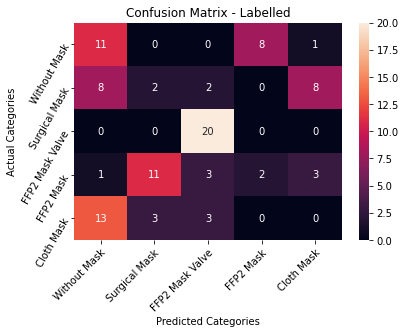

Confusion Matrix for Female
Mask Female Image Classification Report: 
              precision    recall  f1-score   support

           0       0.20      0.12      0.15        32
           1       0.10      0.14      0.12        14
           2       1.00      0.87      0.93        23
           3       0.00      0.00      0.00        11
           4       0.05      0.05      0.05        21

    accuracy                           0.27       101
   macro avg       0.27      0.24      0.25       101
weighted avg       0.31      0.27      0.29       101

Mask Female Image Confusion Matrix: 


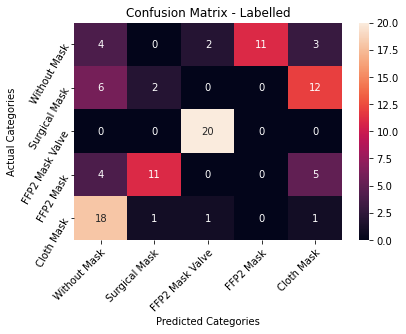

Confusion Matrix for Child
Mask Child Image Classification Report: 
              precision    recall  f1-score   support

           0       0.27      0.19      0.23        36
           1       0.00      0.00      0.00         6
           2       0.50      0.18      0.27        65
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        14

    accuracy                           0.15       127
   macro avg       0.15      0.08      0.10       127
weighted avg       0.33      0.15      0.20       127

Mask Child Image Confusion Matrix: 


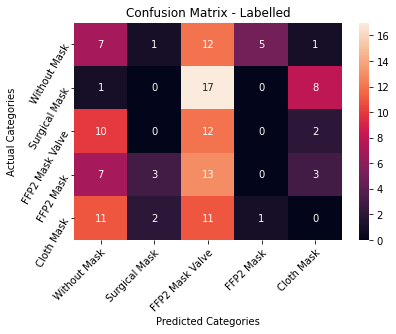

Confusion Matrix for Young
Mask Young Image Classification Report: 
              precision    recall  f1-score   support

           0       0.23      0.21      0.22        29
           1       0.12      0.60      0.19         5
           2       0.95      0.33      0.49        57
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        22

    accuracy                           0.23       122
   macro avg       0.26      0.23      0.18       122
weighted avg       0.50      0.23      0.29       122

Mask Young Image Confusion Matrix: 


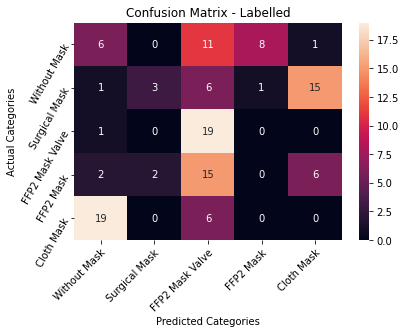

Confusion Matrix for Old
Mask Old Image Classification Report: 
              precision    recall  f1-score   support

           0       0.38      0.22      0.28        46
           1       0.04      0.14      0.06         7
           2       0.32      0.35      0.33        23
           3       0.00      0.00      0.00        20
           4       0.16      0.13      0.14        31

    accuracy                           0.18       127
   macro avg       0.18      0.17      0.16       127
weighted avg       0.24      0.18      0.20       127

Mask Old Image Confusion Matrix: 


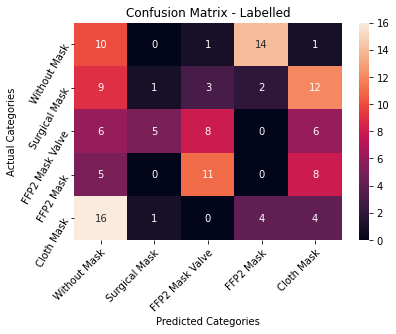

In [ ]:
print("Confusion Matrix for Male")
generate_testing_matrix(model, "Mask Male Image", mask_male)
print("Confusion Matrix for Female")
generate_testing_matrix(model, "Mask Female Image", mask_female)
print("Confusion Matrix for Child")
generate_testing_matrix(model, "Mask Child Image", mask_child)
print("Confusion Matrix for Young")
generate_testing_matrix(model, "Mask Young Image", mask_young)
print("Confusion Matrix for Old")
generate_testing_matrix(model, "Mask Old Image", mask_old)

Image Name ['images.jpg', 'images (3).jpg', 'images (17).jpg', 'images (15).jpg', 'images (20).jpg', 'images (16).jpg', 'images (2).jpg', '1807.jpg', '0135.jpg', '4059.png', '4416.png', '4680.png', '4928.png', '6024.jpg', '6105.jpg', '6071.jpg', '6361.jpg']
Image Labels 0


100%|██████████| 17/17 [00:00<00:00, 56.26it/s]


Image Name ['download.jpg', 'images (22).jpg', 'asian-little-cute-girl-4-260nw-1663247893.jpg', 'images.jpg', 'images (6).jpg', 'images (16).jpg', '566c7ad24c1e66ffdbbc4f140782a418.jpg', 'images (12).jpg', 'download (2).jpg', 'images (8).jpg', 'images (23).jpg', '51vaEV6kydL._UX466_.jpg', '2254.png', '0269.jpg', '1822.jpg', '2979.png', '4190.png', '4272.png', '4401.png']
Image Labels 1


100%|██████████| 19/19 [00:00<00:00, 102.23it/s]


Image Name ['Untitled8.jpg', 'Untitled10.jpg', 'Untitled.jpg', 'Untitled4.jpg', 'RB-FFP-2-N95-Mask-SDL641508963-1-2b90f.jpeg', 'Untitled5.jpg', 'Untitled2.jpg', 'th.jpg', '20Pc-Dust-font-b-Mask-b-font-Disposable-font-b-N95-b-font-Particulate-Respirator-font.jpg', 'Untitled7.jpg', 'respirator-mask-250x250.jpg', '2020-KN95-Mask-Cheap-KN95-Face-Mask-with-Breathing-Valve-Black-Facial-Mask.jpg', 'slider-right4.png', '1_08c846c0-7dc2-4be0-bd1a-396ee20f9ca5 (2) copy.jpg', '004_5_1800x1800 (2).jpeg', '2563a1931bf673de79b6ae17e8d9a194 (2).jpg', '5e843925d4bc653ddaae8a73-large.jpg']
Image Labels 2


100%|██████████| 17/17 [00:00<00:00, 71.65it/s]


Image Name ['1096.jpg', '0332 copy 3.jpg', '0433.jpg', '0821.jpg', '0480.jpg', '2763.png', '4829.png', '2828.png', '0958.jpg', '1083.jpg', '1490.jpg', '0197 (2).png', '0666 copy (2).jpg', '1083 (2).jpg', '1804 (2).jpg']
Image Labels 3


100%|██████████| 15/15 [00:00<00:00, 40.73it/s]


Image Name ['0184.jpg', '1818.jpg', '1919.jpg', '0301.jpg', '2438.png', '2203.png', '2723.png', '3401.png', '3305.png', '3497.png', '3569.png', '3500.png', '3964.png', '4005.png', '3956.png', '4164.png', '4202.png', '4386.png']
Image Labels 4


100%|██████████| 18/18 [00:00<00:00, 55.45it/s]


Loading the dataset.....
Generating the classification report and confusion matrix..... 
Testing Dataset Classification Report: 
              precision    recall  f1-score   support

           0       0.29      0.19      0.23        27
           1       0.05      0.08      0.06        13
           2       0.94      0.70      0.80        23
           3       0.07      0.20      0.10         5
           4       0.11      0.11      0.11        18

    accuracy                           0.29        86
   macro avg       0.29      0.25      0.26        86
weighted avg       0.38      0.29      0.32        86

Testing Dataset Confusion Matrix: 


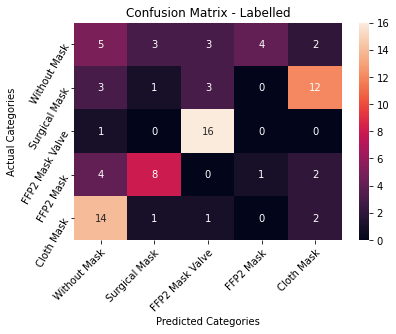

In [ ]:
test_data = []
test_data = load_data(test_data, without_mask_testing_dataset, 0)
test_data = load_data(test_data, surgical_testing_dataset, 1)
test_data = load_data(test_data, ffp2_valve_testing_dataset, 2)
test_data = load_data(test_data, ffp2_testing_dataset, 3)
test_data = load_data(test_data, cloth_testing_dataset,4)

print("Loading the dataset.....")
test_dataset = testing_dataset_loader(test_data)

print("Generating the classification report and confusion matrix..... ")
generate_testing_matrix(model, "Testing Dataset", test_dataset)


[3, 2, 4, 3, 2, 0, 1, 3, 3, 2, 3, 3, 0, 0, 0, 2, 2, 3, 1, 4, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 3, 3, 4, 4, 3, 4, 4, 1, 0, 4, 4, 4, 3, 4, 0, 4, 3, 3, 1, 2, 2, 3, 0, 2, 2, 0, 3, 4, 3, 1, 2, 3, 1, 3, 2, 3, 2, 0, 2, 0, 3, 1, 2, 2, 3, 3, 1, 2, 1, 3, 1, 1, 0, 0, 1, 0, 4, 1, 4, 2, 1, 2, 3, 3, 1, 2, 4, 0, 2, 0, 2, 2, 1, 2, 2, 4, 2, 2, 3, 3, 3, 4, 4, 2, 3, 0, 2, 4, 4, 2, 0, 1, 1, 2, 0, 1, 4, 2, 1, 4, 2, 1, 4, 1, 2, 0, 4, 2, 0, 1, 0, 1, 2, 0, 4, 3, 2, 2, 0, 4, 0, 0, 3, 1, 2, 0, 0, 1, 0, 3, 1, 0, 3, 4, 3, 4, 0, 1, 3, 0, 3, 3, 0, 2, 1, 2, 0, 1, 3, 2, 1, 4, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 2, 0, 2, 2, 3, 1, 0, 3, 1, 1, 3, 1, 0, 4, 2, 0, 1, 1, 2, 1, 0, 2, 3, 4, 0, 2, 4, 2, 4, 0, 2, 3, 2, 0, 0, 3, 4, 4, 0, 4, 2, 1, 3, 1, 2, 0, 3, 3, 1, 0, 0, 1, 4, 1, 1, 4, 2, 2, 3, 0, 1, 4, 3, 0, 4, 1, 3, 1, 1, 4, 1, 1, 3, 4, 3, 0, 2, 0, 3, 3, 2, 4, 0, 1, 1, 0, 1, 2, 2, 4, 1, 1, 1, 1, 4, 4, 0, 3, 4, 3, 4, 3, 3, 4, 0, 0, 0, 4, 3, 2, 4, 1, 0, 0, 0, 1, 4, 4, 0, 1, 4, 3, 0, 0, 3, 0, 2, 2, 3, 4, 0, 1, 3, 4, 0, 2, 1, 3, 2, 4, 1, 

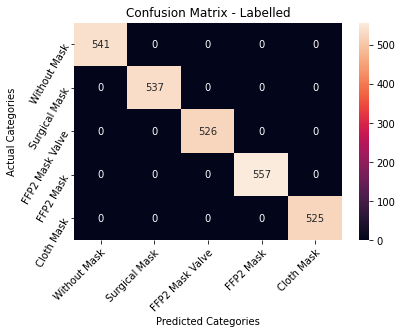

[4, 4, 4, 0, 1, 4, 0, 1, 4, 4, 0, 3, 3, 4, 3, 1, 0, 2, 0, 2, 4, 3, 0, 3, 4, 4, 0, 3, 0, 4, 0, 2, 1, 0, 3, 0, 1, 4, 2, 3, 0, 4, 4, 0, 2, 1, 0, 2, 2, 4, 2, 0, 2, 2, 0, 4, 3, 4, 2, 0, 0, 3, 3, 4, 3, 2, 2, 0, 0, 0, 4, 2, 1, 4, 4, 2, 0, 4, 3, 4, 4, 1, 0, 2, 4, 0, 3, 1, 3, 2, 0, 1, 3, 4, 1, 3, 3, 4, 1, 1, 0, 3, 4, 2, 2, 0, 3, 0, 2, 4, 4, 4, 2, 3, 1, 1, 3, 1, 0, 2, 0, 1, 0, 1, 3, 2, 0, 4, 4, 2, 2, 0, 1, 3, 4, 3, 4, 2, 0, 2, 4, 1, 0, 3, 0, 0, 0, 0, 1, 3, 1, 1, 4, 4, 0, 0, 0, 4, 2, 3, 0, 3, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 1, 0, 2, 4, 0, 0, 4, 1, 4, 3, 3, 2, 3, 0, 3, 0, 4, 3, 0, 4, 0, 3, 2, 2, 0, 1, 4, 3, 4, 4, 2, 0, 0, 0, 3, 1, 2, 0, 1, 0, 4, 0, 2, 0, 4, 1, 0, 4, 1, 1, 2, 0, 4, 0, 3, 0, 1, 0, 0, 3, 4, 4, 2, 1, 1, 0, 0, 2, 4, 0, 0, 4, 1, 4, 4, 1, 4, 0, 4, 2, 0, 3, 2, 3, 4, 2, 4, 4, 2, 3, 3, 0, 4, 3, 2, 2, 1, 0, 4, 2, 1, 3, 4, 4, 0, 2, 3, 1, 4, 3, 2, 3, 3, 3, 4, 0, 1, 0, 4, 1, 3, 0, 4, 3, 0, 2]
[1, 1, 4, 1, 1, 1, 0, 1, 4, 0, 0, 3, 3, 4, 3, 3, 0, 2, 0, 2, 4, 3, 0, 3, 4, 1, 0, 3, 0, 3, 0, 2, 4, 1, 3,

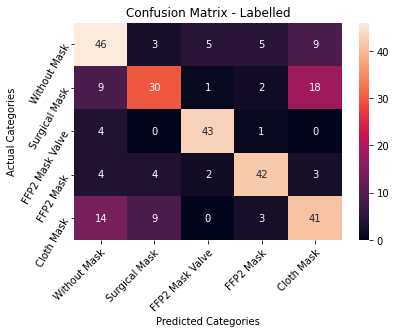

In [ ]:
generate_matrix(model, "Training", train_loader, classes)
generate_matrix(model, "Testing", test_loader, classes)